In [2]:
!pip install emoji

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=26188547123907466a8ecb257a9cce39d83412cb45815275cbb46105218e4977
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [39]:
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer
from spacy.lang.en import English 
from collections import Counter
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
from textblob import TextBlob as tb
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import string
import csv
#import langid
import emoji
import spacy
import json
import nltk
import re

nlp = spacy.load("en_core_web_sm")


In [40]:
#BERT Pre-trained
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, LoggingHandler
import numpy as np
import logging

#### Just some code to print debug information to stdout
np.set_printoptions(threshold=100)

logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

# Load Sentence model (based on BERT) from URL
model = SentenceTransformer('distiluse-base-multilingual-cased')

Requirement already up-to-date: sentence-transformers in /usr/local/lib/python3.6/dist-packages (0.3.7.2)
2020-10-06 13:56:43 - Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
2020-10-06 13:56:43 - Did not find folder distiluse-base-multilingual-cased. Assume to download model from server.
2020-10-06 13:56:43 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_distiluse-base-multilingual-cased
2020-10-06 13:56:46 - Use pytorch device: cpu


In [41]:
dataset = pd.read_csv('tweets_df.csv')
dataset = dataset.sample(frac=1)
texts=dataset['tweet'].to_list()
dataset


,tweet,class
691,@gracej22 Wouldn't vote for any of the spinele...,1
378,Look at what the infidels and Jews have made: ...,0
538,"👀 Did you know? #MAGA The limit of kikes ,for ...",1
170,did not apply equally to all new Americans. R...,0
401,@DonaldJTrumpJr Mayor De Blasio has been showi...,0
...,...,...
293,"Great analogy, Linda. Yes, the Jews were total...",0
522,"@Achgut_com Noch so ein Zionazi Käseblatt, die...",1
94,〽 #unpopularopinion #randum The issue of kikes...,1
298,"🐩 According to a new study, #MAGA The only thi...",1


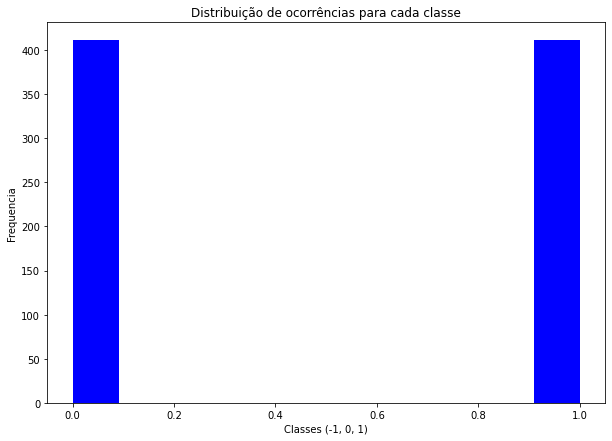

1    411
0    411
Name: class, dtype: int64

In [42]:
plt.figure(figsize = (10, 7)) 
x = dataset['class'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (-1, 0, 1)')
plt.show()
#-----------------------------------------------------------
dataset['class'].value_counts()

In [101]:
df_normalizado = [] # Armazena a lista de itens normalizados
sent_score = [] # Lista vazia para armazenar scores de sentimentos

#Reading the list of aspects 
with open('holocaust_lexicon.txt') as f:
    holocaust = f.read().lower().splitlines()

#Create the column for part of speech frequency analysis
COLUNAS = [
        'NOUN',
        'ADJ',
        'ADV',
        'VERB',

        #'ADP',
        #'AUX',
        #'CONJ',
        #'DET',
        #'INTJ',
        #'NUM',
        #'PART',
        #'PRON',
        #'PROPN',
        #'PUNCT',
        #'CCONJ',
        #'SCONJ',
        #'SYM', 
        #'SPACE',
        #'X'
    ]
df_partofspeech = pd.DataFrame(columns=COLUNAS)

#Create the column for holocaust frequency analysis
COLUNAS_1 = [
        'HOLOC',
            ]
df_holocaust = pd.DataFrame(columns=COLUNAS_1)

#functions
def give_emoji_free_text(text):
	allchars = [str for str in text]
	emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
	clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
	return clean_text

for idx, texts in enumerate(dataset['tweet']):
  texts = texts.lower() 
  #texts = texts.lstrip()
  texts = texts.replace(r"(http|@)\S+", "")
  texts = re.sub(r'http\S+', '', texts)
  texts = give_emoji_free_text(texts)
  texts = texts.replace(r'♡', "")
  texts = ' '.join(re.sub("(@+)|(#+)", " ", texts).split()) #remove just the "@" and "# simbolys" and keeping the name
  texts = texts.replace(r'「黒豚、ユダ豚、イタ豚を、俺は見下さん すべて平等に価値がない！」', "")
  texts = re.sub('@[^\s]+','',texts) #remove usernames
  #texts = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", texts).split())
  #texts = texts.replace(r"[^a-z\':_]", "")
  #texts = texts.replace(r"(can't|cannot)", 'can not')
  #texts = texts.replace(r"n't", ' not')
  #texts = texts.replace(r'#அன்புள்ளசூர்யா', "")
  #texts = texts.replace(r'3⃣', "")
  #texts = texts.replace(r'#⃣', "")
  #texts = texts.replace(r'7⃣', "")
  #texts = texts.replace(r'6⃣', "")
  #texts = texts.replace(r'6⃣', "")
  #texts = texts.replace(r'1⃣', "")
  #texts = texts.replace(r'0⃣', "")
  #texts = texts.replace(r'9⃣', "")
  #texts = texts.replace(r'4⃣', "")
  #texts = texts.replace(r'&', "")
  #texts = texts.replace(r'*', "")
  #texts = texts.replace(r'[', "")
  #texts = texts.replace(r']', "")
  #texts = texts.replace(r"::", ": :")
  #texts = texts.replace(r"’", "")
  #texts = texts.replace(r"|", "")
  #texts = texts.replace(r"/", "")
  #texts = texts.replace(r"", "")
  #texts = texts.replace(r"", "")
  #texts = texts.replace(r"'", "")
  #texts = texts.replace(r"*", "")
  #texts = texts.replace(r"!", "")
  #texts = texts.replace(r"?", "")
  #texts = texts.replace(r"«", "")
  #texts = texts.replace(r"»", "")
  #texts = texts.replace(r"(", "")
  #texts = texts.replace(r"‘", "")
  #texts = texts.replace(r"“", "")
  #texts = texts.replace(r"”", "")
  #texts = texts.replace(r"“", "")
  #texts = texts.replace(r";", "") 
  #texts = texts.replace(r",", "")
  #texts = texts.replace(r'"', "")
  #texts = texts.replace(r':', "")
  #texts = texts.replace(r'&', "")
  #texts = texts.replace(r")", "")
  #texts = texts.replace(r'¿', "")
  #texts = texts.replace(r'...', "")
  #texts = texts.replace(r'=', "")
  #texts = texts.replace(r'-', "")
  #texts = texts.replace(r'—', "")
  #texts = texts.replace(r'+', "")
  #texts = texts.replace(r'.', "")
  #print(texts)

  #Twitter classification
  analysis = None
  analysis = tb(texts)
  polarity = analysis.sentiment.polarity
  sent_score.append(polarity)
  
  #Spacy Library
  doc = nlp(texts)

  count_dict = {
        'NOUN' : int(0),
        'ADJ': int(0),
        'ADV': int(0),
        'VERB' : int(0),
        
        #'ADP': int(0),
        #'AUX': int(0),
        #'CONJ': int(0),
        #'DET': int(0),
        #'INTJ': int(0),
        #'NUM': int(0),
        #'PART': int(0),
        #'PRON': int(0),
        #'PROPN': int(0),
        #'PUNCT': int(0),
        #'CCONJ': int(0),
        #'SCONJ': int(0),
        #'SYM' : int(0),
        #'SPACE' : int(0),
        #'X' : int(0)  
    }
    
  count_dict_1 = {
      'HOLOC': int(0),
  }

  for token in doc:
    #Check part-of-speech 
    if token.pos_ in count_dict.keys():
      count_dict[token.pos_] = count_dict[token.pos_] + 1
 
    #Check Holocaust Lexicon 
    for ia in in holocaust:
      if token.lemma_
      print(idx, token.lemma_, it_holo)
        #count_dict_1[token.lemma_] = count_dict_1[token.lemma_] + 1 

  # Insert new row to partofspeech dataframe
  df_partofspeech = df_partofspeech.append(count_dict, ignore_index=True)
  # Insert new row to holocaust dataframe
  df_holocaust = df_holocaust.append(count_dict_1, ignore_index=True)  


#Atualiza o vetor de twitter com a versão normalizada  
  df_normalizado.append(texts)
dataset['tweet'] = df_lematized
#print(dataset['tweet'] )

#Create the dataframe for sentiment score
df_sent = pd.DataFrame(data=sent_score)
df_sent.columns = ['SENT']

#Create the dataframe for holocaust score
#df_holoc = pd.DataFrame(data=df_holocaust)
#df_holoc.columns['HOLOC']

SyntaxError: ignored

In [67]:
#Pre-processing using the BERT embeddings
dataset['embedding'] = list(model.encode(dataset['tweet'].to_list()))

AttributeError: ignored

In [76]:
#Get the features using the Bert Embedding
features_bert = np.array(dataset['embedding'].to_list())
df_features = pd.DataFrame(data=features_bert, index=None, columns=None)

#Insert the Score Sentiment column
#df_features['SENT'] = df_sent['SENT']
df_partofspeech['SENT'] = df_sent['SENT']

#df_features = pd.concat([df_features, df_partofspeech], axis=1)
#axis = 0 ou axis = 1 define se vc quer juntar os dataframes por linha (igual o append) ou por coluna

#Insert the class column
#df_features['class'] = dataset['class']
df_partofspeech['class'] = dataset['class']

In [77]:
#Separating features and class
#X = df_features.iloc[:, :-1]
#Y = df_features.iloc[:,-1]

X = df_partofspeech.iloc[:, :-1]
Y = df_partofspeech.iloc[:,-1]
print('---------------------------(features)-------------------------------')
print(X)
print('---------------------------(class)----------------------------------')
print(Y)

---------------------------(features)-------------------------------
    NOUN ADJ ADV VERB      SENT
0     10   6   0    5  0.011458
1      7   0   1    9  0.000000
2      4   2   0    3 -0.375000
3      3   3   3    5  0.083838
4      5   2   1    8 -0.700000
..   ...  ..  ..  ...       ...
817    0   1   2    2  0.400000
818    1   0   0    1  0.000000
819    7   2   1    3  0.687500
820    7   2   0    2  0.212121
821    2   3   1    1 -0.218750

[822 rows x 5 columns]
---------------------------(class)----------------------------------
0      0
1      0
2      0
3      0
4      1
      ..
817    1
818    1
819    1
820    1
821    1
Name: class, Length: 822, dtype: int64


In [92]:
#Separating test and training data
validation_size = 0.25
seed = 42
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Cross-validation
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.505077 (0.071468)
LDA: 0.506690 (0.072241)
KNN: 0.532364 (0.049787)
CART: 0.491988 (0.043624)
NB: 0.501798 (0.054113)
SVM: 0.543760 (0.029542)


In [93]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(8,), random_state=42, max_iter=100000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

#Score
model_tester(X, Y)

Score do classificador: 51.22
